# Coorelations of the v3 database 

Correlation matrices for the v3 database

v3 uses GRACE data with altitude (e.g., hasn't been normalized to 400 km)

## Purpose

- Identify the key features for new models 
- Remove features with high colinearity

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib qt

#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
fn = 'D:\data\SatDensities\satdrag_database_grace_B_v3.hdf5'
df = pd.read_hdf(fn)
print(df.columns)

Index(['DateTime', 'DateTime_omni', 'Year', 'DOY', 'Hour', 'Minute', 'IMF_id',
       'SW_id', 'IMF_pt', 'SW_pt',
       ...
       'mlon', 'mlt', 'xrsa_flux_g11_x', 'xrsb_flux_g11_x', 'xrsa_flux_g15_x',
       'xrsb_flux_g15_x', 'xrsa_flux_g11_y', 'xrsb_flux_g11_y',
       'xrsa_flux_g15_y', 'xrsb_flux_g15_y'],
      dtype='object', length=102)


In [21]:
dens_col = 'dens_x'

fism_columns = ['225_00', '600_01', '1300_02', '2500_03', '5100_04',
            '11250_05', '18950_06', '25700_07', '30500_08', '43000_09', '59500_10',
            '72400_11', '72400_12', '85550_13', '85550_14', '85550_15', '94400_16',
            '94400_17', '94400_18', '98100_19', '100700_20', '103850_21',
            '113000_22']
fism_columns.append(dens_col)

omni_columns = ['B', 'Bx_GSEGSM', 'By_GSE', 'Bz_GSE', 'By_GSM', 'Bz_GSM', 
        'Vsw', 'Vx_GSE', 'Vy_GSE', 'Vz_GSE', 'Prho',
       'Tp', 'dynP', 'Esw', 'Beta', 'AlfvenMach'
       , 'AE', 'AL', 'AU', 'SYM_D index', 'SYM_H index',
       'ASY_D index', 'ASY_H index',
       'Goes Proton flux (>10 MeV)',
       'Goes Proton flux (>30 MeV)']
omni_columns.append(dens_col)

goes_columns = ['xrsa_flux_g15_x', 'xrsb_flux_g15_x']
goes_columns.append(dens_col)

In [7]:
# identify the storm and quiet times
st_t = (df['storm']>0.95) & (df['storm']<1.05) # storm times
qt_t = (df['storm']<0) # quiet times
mn_p = (df['storm phase']>0.95) & (df['storm phase']<1.05) # main phase
rc_p = (df['storm phase']>1.95) & (df['storm phase']<2.05) # recovery phase

In [8]:
qt_t.value_counts()
st_t.value_counts()

storm
False    628368
True     623067
Name: count, dtype: int64

storm
True     628368
False    623067
Name: count, dtype: int64

### Generate correlation matrices

In [9]:
def cor_matrix(data, columns, dens_col, 
               qt_t,st_t,mn_p,rc_p):

    cor_plot = pd.DataFrame()
    cor_plot['All'] = data[columns].dropna().corr()[dens_col]
    cor_plot['Quiet'] = data[qt_t][columns].dropna().corr()[dens_col]
    cor_plot['Storm'] = data[st_t][columns].dropna().corr()[dens_col]
    cor_plot['Main'] = data[mn_p][columns].dropna().corr()[dens_col]
    cor_plot['Recovery'] = data[rc_p][columns].dropna().corr()[dens_col]

    return cor_plot

    

#### FISM Correlations

In [10]:
%matplotlib inline

In [11]:
c_fism = cor_matrix(df,fism_columns,dens_col,qt_t,st_t,mn_p,rc_p)

<Figure size 800x800 with 0 Axes>

<Axes: >

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0, 0.5, '225_00'),
  Text(0, 1.5, '600_01'),
  Text(0, 2.5, '1300_02'),
  Text(0, 3.5, '2500_03'),
  Text(0, 4.5, '5100_04'),
  Text(0, 5.5, '11250_05'),
  Text(0, 6.5, '18950_06'),
  Text(0, 7.5, '25700_07'),
  Text(0, 8.5, '30500_08'),
  Text(0, 9.5, '43000_09'),
  Text(0, 10.5, '59500_10'),
  Text(0, 11.5, '72400_11'),
  Text(0, 12.5, '72400_12'),
  Text(0, 13.5, '85550_13'),
  Text(0, 14.5, '85550_14'),
  Text(0, 15.5, '85550_15'),
  Text(0, 16.5, '94400_16'),
  Text(0, 17.5, '94400_17'),
  Text(0, 18.5, '94400_18'),
  Text(0, 19.5, '98100_19'),
  Text(0, 20.5, '100700_20'),
  Text(0, 21.5, '103850_21'),
  Text(0, 22.5, '113000_22')])

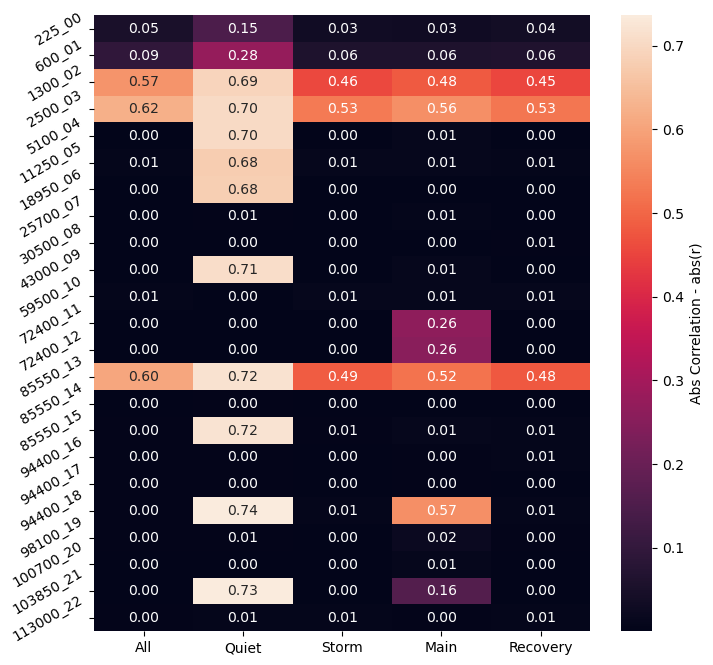

In [12]:
plt.figure(figsize=(8, 8))
sns.heatmap(c_fism[0:-1].abs(),annot=True, fmt='.2f', cbar_kws={'label':'Abs Correlation - abs(r)'})
plt.yticks(rotation=30) 
plt.show()

In [18]:
c_omni = cor_matrix(df,omni_columns,dens_col,qt_t,st_t,mn_p,rc_p)

<Figure size 800x800 with 0 Axes>

<Axes: >

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0, 0.5, 'B'),
  Text(0, 1.5, 'Bx_GSEGSM'),
  Text(0, 2.5, 'By_GSE'),
  Text(0, 3.5, 'Bz_GSE'),
  Text(0, 4.5, 'By_GSM'),
  Text(0, 5.5, 'Bz_GSM'),
  Text(0, 6.5, 'Vsw'),
  Text(0, 7.5, 'Vx_GSE'),
  Text(0, 8.5, 'Vy_GSE'),
  Text(0, 9.5, 'Vz_GSE'),
  Text(0, 10.5, 'Prho'),
  Text(0, 11.5, 'Tp'),
  Text(0, 12.5, 'dynP'),
  Text(0, 13.5, 'Esw'),
  Text(0, 14.5, 'Beta'),
  Text(0, 15.5, 'AlfvenMach'),
  Text(0, 16.5, 'AE'),
  Text(0, 17.5, 'AL'),
  Text(0, 18.5, 'AU'),
  Text(0, 19.5, 'SYM_D index'),
  Text(0, 20.5, 'SYM_H index'),
  Text(0, 21.5, 'ASY_D index'),
  Text(0, 22.5, 'ASY_H index'),
  Text(0, 23.5, 'Goes Proton flux (>10 MeV)'),
  Text(0, 24.5, 'Goes Proton flux (>30 MeV)')])

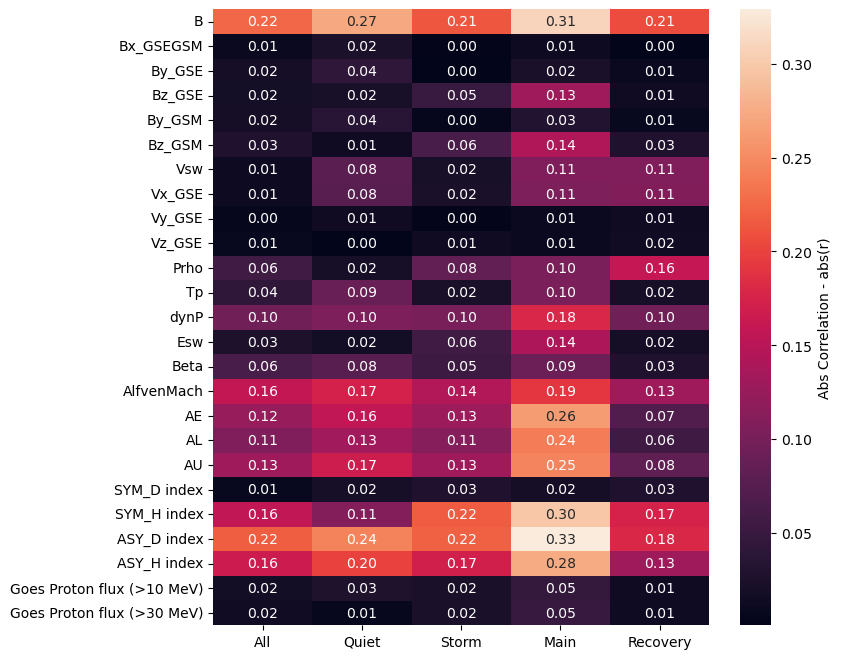

In [14]:
plt.figure(figsize=(8, 8))
sns.heatmap(c_omni[0:-1].abs(),annot=True, fmt='.2f', cbar_kws={'label':'Abs Correlation - abs(r)'})
plt.yticks() 
plt.show()

In [23]:
c_goes = cor_matrix(df,goes_columns,dens_col,qt_t,st_t,mn_p,rc_p)
c_goes

,All,Quiet,Storm,Main,Recovery
xrsa_flux_g15_x,0.021790,0.020995,0.024640,0.001142,0.035683
xrsb_flux_g15_x,0.067173,0.084153,0.054593,0.013117,0.072455
dens_x,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 800x800 with 0 Axes>

<Axes: >

(array([0.5, 1.5]),
 [Text(0, 0.5, 'xrsa_flux_g15_x'), Text(0, 1.5, 'xrsb_flux_g15_x')])

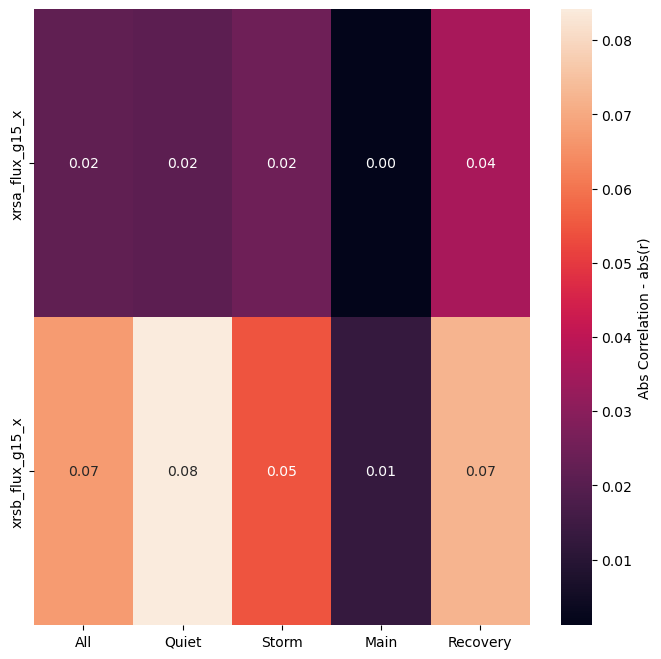

In [24]:
plt.figure(figsize=(8, 8))
sns.heatmap(c_goes[0:-1].abs(),annot=True, fmt='.2f', cbar_kws={'label':'Abs Correlation - abs(r)'})
plt.yticks() 
plt.show()